# Activity 2: Visualizing Logistic Regression, from Log-Odds to Probabilities

As usual, we begin with a few import statements. We'll be using:
- `numpy` for numeric operations and to draw random samples
- `pandas` for our dataframe
- `sklearn` to fit `LogisticRegression` models
- `matplotlib` to plot stuff

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Let's generate a simple toy dataset

Don't worry about the details here. The goal is to explore the relationship between these variables over the course of the exercise.

- features male_sex (binary) and age (numeric)
- outcome high blood pressure ('hbp')

In [2]:
rs = np.random.RandomState(42)

df = pd.DataFrame({
    'male_sex': rs.randint(0, 2, 50) == 1,
    'age': rs.rand(50) * 90,
})

df['hbp'] = (1 / (1 + np.exp(1.5 - df['male_sex'] - df['age'] / 50))) > rs.rand(50)

df.head(10)

,male_sex,age,hbp
0,False,70.665837,False
1,True,17.970640,False
2,False,46.281099,True
3,False,53.317311,True
4,False,4.180537,True
5,True,54.679037,False
6,False,15.347171,False
7,False,5.854643,False
8,False,85.399698,True
9,True,86.906883,True


# Let's explore the relationship between sex and HBP risk

## Exploration 1, Part 1

Consider (a) female patients (`df[~df['male_sex']]`) and (b) male patients (`df[df['male_sex']]`).
- what are the odds of high blood pressure in each group?
- what are the log odds of high blood pressure in each group?
- what is the difference in log odds between groups?
- what is the odds ratio between groups?
- what is the log odds ratio between groups?

**Use the block(s) below to calculate these quantities. Create more blocks if/as needed.**

## Exploration 1, Part 2

Let's use scikit-learn to quickly fit a logistic regression model to these (training) data. We can then look at the intercept and coefficient associated with male sex in the fitted model. **How do these quantities relate to the values you calculated previously?**

In [3]:
mdl = LogisticRegression(penalty='none').fit(df[['male_sex']], df['hbp'])

print('The intercept is %.3f' % mdl.intercept_)
print('The coefficient associated with male sex is %.3f' % mdl.coef_)

The intercept is -0.629
The coefficient associated with male sex is 1.322


## Exploration 2, Part 1

Let's now consider the relationship between blood pressure and age.
- This time we'll *start* by fitting a logistic regression model
- Then we'll use the model coefficients directly to plot the predicted log-odds of high blood pressure by age

The intercept is -1.457
The coefficient associated with age is 0.036


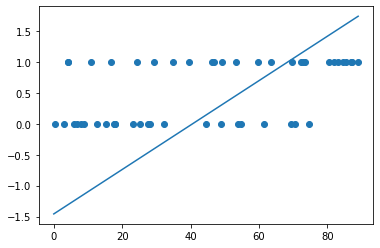

In [4]:
mdl = LogisticRegression(penalty='none').fit(df[['age']], df['hbp'])

intercept = mdl.intercept_[0]
age_coefficient = mdl.coef_[0][0]

print('The intercept is %.3f' % intercept)
print('The coefficient associated with age is %.3f' % age_coefficient)

age = np.arange(90)
log_odds = intercept + age_coefficient * age

plt.scatter(df['age'], df['hbp'])
plt.plot(age, log_odds)
plt.show()

## Exploration 2, Part 2

We'll complete the exploration by taking a look at two more plots:
- predicted odds of high blood pressure by age
- predicted probability of high blood pressure by age

**Use the block(s) below to create these plots. Create more blocks if/as needed.**